## Example

In [2]:
import pandas as pd
import numpy as np

from kmodes.kmodes import KModes
import matplotlib.pyplot as plt

%matplotlib inline

In [27]:
data = pd.read_csv('~/Downloads/JuanPanda1-Merged.csv')
# data = data.reset_index()
data = data.drop(columns=["Unnamed: 13", "Unnamed: 14", "Unnamed: 15"])
data

,gender,age,residence,daily allowance,attendance,dismissal,travel,breaks,transportation,foodCampus,Q1,Q2,Q3
0,Female,22,Imus,₱200 to ₱500,1 to 2 times a week,"Early Afternoon (e.g. 1:00PM, 3:00PM)",Less than 500m (approx. distance from Gate 3 t...,1 break,"Commute (e.g. jeep, bus, tricycle)",Yes,Food Square,"Rice meal, Beverages (e.g., fruit/milk shake, ...",₱100 to ₱200
1,Male,22,Bacoor,₱100 to ₱200,3 to 4 times a week,"Late Afternoon (e.g. 4:00PM, 5:00PM)",Less than 500m (approx. distance from Gate 3 t...,1 break,"Commute (e.g. jeep, bus, tricycle)",Yes,Food Square,"Rice meal, Water",₱100 to ₱200
2,Male,22,Silang,₱100 to ₱200,1 to 2 times a week,"Late Afternoon (e.g. 4:00PM, 5:00PM)",Less than 500m (approx. distance from Gate 3 t...,1 break,"Personal transportation (e.g. car, motorcycle)",No,Orange house,Rice meal,Below ₱100
3,Male,22,Bacoor,₱100 to ₱200,3 to 4 times a week,"Early Afternoon (e.g. 1:00PM, 3:00PM)",Less than 500m (approx. distance from Gate 3 t...,1 break,"Commute (e.g. jeep, bus, tricycle)",Yes,Food Square,"Rice meal, Finger foods (e.g., fries, takoyaki...",₱100 to ₱200
4,Male,25,General Trias,₱200 to ₱500,3 to 4 times a week,Noon (12:00PM),More than 1km,2-3 breaks,"Commute (e.g. jeep, bus, tricycle)",No,Savemore,Rice meal,₱100 to ₱200
...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,Male,23,Imus,Below ₱100,1 to 2 times a week,Morning (e.g. 10:00AM),Less than 500m (approx. distance from Gate 3 t...,2-3 breaks,"Commute (e.g. jeep, bus, tricycle)",No,Waltermart,Rice meal,Below ₱100
114,Male,21,Bacoor,Below ₱100,1 to 2 times a week,Noon (12:00PM),Around 1km (approx. distance from Gate 3 to Fo...,1 break,"Commute (e.g. jeep, bus, tricycle)",Yes,Milas' Canteen,"Finger foods (e.g., fries, takoyaki, etc)",Below ₱100
115,Male,21,Imus,Below ₱100,1 to 2 times a week,Morning (e.g. 10:00AM),Less than 500m (approx. distance from Gate 3 t...,1 break,"Commute (e.g. jeep, bus, tricycle)",Yes,Food Square,Rice meal,Below ₱100
116,Female,19,Dasma,"₱500 to ₱1,000",1 to 2 times a week,Noon (12:00PM),Around 1km (approx. distance from Gate 3 to Fo...,2-3 breaks,"Personal transportation (e.g. car, motorcycle)",No,SM Dasma,"Rice meal, Beverages (e.g., fruit/milk shake, ...",₱200 to ₱500


In [28]:
null_data = data[data.isnull().any(axis=1)]
null_data

,gender,age,residence,daily allowance,attendance,dismissal,travel,breaks,transportation,foodCampus,Q1,Q2,Q3


Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 683.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 683.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 683.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 683.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 683.0
Best run was number 1
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 12, cost: 647.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 44, cost: 599.0
Run 2, iteration: 2/100, moves: 1, cost: 599.0
Init: initializing centroids
Init: initi

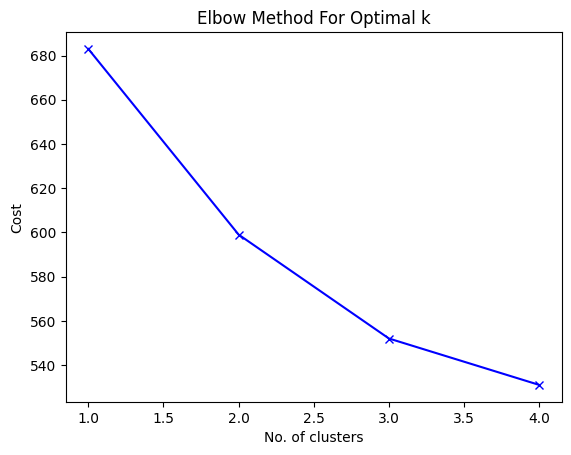

In [29]:
# Elbow curve to find optimal K
cost = []
K = range(1,5)
for num_clusters in list(K):
    kmode = KModes(n_clusters=num_clusters, init = "random", n_init = 5, verbose=1)
    kmode.fit_predict(data)
    cost.append(kmode.cost_)
    
plt.plot(K, cost, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()

In [31]:
# Building the model with 3 clusters
kmode = KModes(n_clusters=2, init = "random", n_init = 5, verbose=1)
clusters = kmode.fit_predict(data)
clusters

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 23, cost: 608.0
Run 1, iteration: 2/100, moves: 3, cost: 608.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 23, cost: 617.0
Run 2, iteration: 2/100, moves: 3, cost: 617.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 18, cost: 611.0
Run 3, iteration: 2/100, moves: 19, cost: 611.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 26, cost: 609.0
Run 4, iteration: 2/100, moves: 8, cost: 609.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 29, cost: 599.0
Run 5, iteration: 2/100, moves: 0, cost: 599.0
Best run was number 5


array([1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0], dtype=uint16)

In [32]:
data.insert(0, "Cluster", clusters, True)
data

,Cluster,gender,age,residence,daily allowance,attendance,dismissal,travel,breaks,transportation,foodCampus,Q1,Q2,Q3
0,1,Female,22,Imus,₱200 to ₱500,1 to 2 times a week,"Early Afternoon (e.g. 1:00PM, 3:00PM)",Less than 500m (approx. distance from Gate 3 t...,1 break,"Commute (e.g. jeep, bus, tricycle)",Yes,Food Square,"Rice meal, Beverages (e.g., fruit/milk shake, ...",₱100 to ₱200
1,1,Male,22,Bacoor,₱100 to ₱200,3 to 4 times a week,"Late Afternoon (e.g. 4:00PM, 5:00PM)",Less than 500m (approx. distance from Gate 3 t...,1 break,"Commute (e.g. jeep, bus, tricycle)",Yes,Food Square,"Rice meal, Water",₱100 to ₱200
2,1,Male,22,Silang,₱100 to ₱200,1 to 2 times a week,"Late Afternoon (e.g. 4:00PM, 5:00PM)",Less than 500m (approx. distance from Gate 3 t...,1 break,"Personal transportation (e.g. car, motorcycle)",No,Orange house,Rice meal,Below ₱100
3,1,Male,22,Bacoor,₱100 to ₱200,3 to 4 times a week,"Early Afternoon (e.g. 1:00PM, 3:00PM)",Less than 500m (approx. distance from Gate 3 t...,1 break,"Commute (e.g. jeep, bus, tricycle)",Yes,Food Square,"Rice meal, Finger foods (e.g., fries, takoyaki...",₱100 to ₱200
4,0,Male,25,General Trias,₱200 to ₱500,3 to 4 times a week,Noon (12:00PM),More than 1km,2-3 breaks,"Commute (e.g. jeep, bus, tricycle)",No,Savemore,Rice meal,₱100 to ₱200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,0,Male,23,Imus,Below ₱100,1 to 2 times a week,Morning (e.g. 10:00AM),Less than 500m (approx. distance from Gate 3 t...,2-3 breaks,"Commute (e.g. jeep, bus, tricycle)",No,Waltermart,Rice meal,Below ₱100
114,0,Male,21,Bacoor,Below ₱100,1 to 2 times a week,Noon (12:00PM),Around 1km (approx. distance from Gate 3 to Fo...,1 break,"Commute (e.g. jeep, bus, tricycle)",Yes,Milas' Canteen,"Finger foods (e.g., fries, takoyaki, etc)",Below ₱100
115,1,Male,21,Imus,Below ₱100,1 to 2 times a week,Morning (e.g. 10:00AM),Less than 500m (approx. distance from Gate 3 t...,1 break,"Commute (e.g. jeep, bus, tricycle)",Yes,Food Square,Rice meal,Below ₱100
116,0,Female,19,Dasma,"₱500 to ₱1,000",1 to 2 times a week,Noon (12:00PM),Around 1km (approx. distance from Gate 3 to Fo...,2-3 breaks,"Personal transportation (e.g. car, motorcycle)",No,SM Dasma,"Rice meal, Beverages (e.g., fruit/milk shake, ...",₱200 to ₱500


In [34]:
data.to_csv('JuanPanda-Output.csv')

# Approach #1: Train on Separate Clusters
Since the dataset already has its own clusters (inside vs outside), we can train those invidually.

In [9]:
dataset = pd.read_csv('~/Downloads/JuanPanda1-FullDataset.csv')
dataset = data.reset_index()
dataset

,level_0,index,gender,age,residence,daily_allowance,attendance,dismissal,travel,breaks,transportation,foodCampus,A1,A2,A3,B1,B2,B3
0,0,0,Female,22,Imus,₱200 to ₱500,1 to 2 times a week,"Early Afternoon (e.g. 1:00PM, 3:00PM)",Less than 500m (approx. distance from Gate 3 t...,1 break,"Commute (e.g. jeep, bus, tricycle)",Yes,Food Square,"Rice meal, Beverages (e.g., fruit/milk shake, ...",₱100 to ₱200,NaN,NaN,NaN
1,1,1,Male,22,Bacoor,₱100 to ₱200,3 to 4 times a week,"Late Afternoon (e.g. 4:00PM, 5:00PM)",Less than 500m (approx. distance from Gate 3 t...,1 break,"Commute (e.g. jeep, bus, tricycle)",Yes,Food Square,"Rice meal, Water",₱100 to ₱200,NaN,NaN,NaN
2,2,2,Male,22,Silang,₱100 to ₱200,1 to 2 times a week,"Late Afternoon (e.g. 4:00PM, 5:00PM)",Less than 500m (approx. distance from Gate 3 t...,1 break,"Personal transportation (e.g. car, motorcycle)",No,NaN,NaN,NaN,Orange house,Rice meal,Below ₱100
3,3,3,Male,22,Bacoor,₱100 to ₱200,3 to 4 times a week,"Early Afternoon (e.g. 1:00PM, 3:00PM)",Less than 500m (approx. distance from Gate 3 t...,1 break,"Commute (e.g. jeep, bus, tricycle)",Yes,Food Square,"Rice meal, Finger foods (e.g., fries, takoyaki...",₱100 to ₱200,NaN,NaN,NaN
4,4,4,Male,25,General Trias,₱200 to ₱500,3 to 4 times a week,Noon (12:00PM),More than 1km,2-3 breaks,"Commute (e.g. jeep, bus, tricycle)",No,NaN,NaN,NaN,Save more,Rice meal,₱100 to ₱200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,113,113,Male,23,Imus,Below ₱100,1 to 2 times a week,Morning (e.g. 10:00AM),Less than 500m (approx. distance from Gate 3 t...,2-3 breaks,"Commute (e.g. jeep, bus, tricycle)",No,NaN,NaN,NaN,Waltermart Dasma,Rice meal,Below ₱100
114,114,114,Male,21,Bacoor,Below ₱100,1 to 2 times a week,Noon (12:00PM),Around 1km (approx. distance from Gate 3 to Fo...,1 break,"Commute (e.g. jeep, bus, tricycle)",Yes,Milas' Canteen,"Finger foods (e.g., fries, takoyaki, etc)",Below ₱100,NaN,NaN,NaN
115,115,115,Male,21,Imus,Below ₱100,1 to 2 times a week,Morning (e.g. 10:00AM),Less than 500m (approx. distance from Gate 3 t...,1 break,"Commute (e.g. jeep, bus, tricycle)",Yes,Food Square,Rice meal,Below ₱100,NaN,NaN,NaN
116,116,116,Female,19,Dasma,"₱500 to ₱1,000",1 to 2 times a week,Noon (12:00PM),Around 1km (approx. distance from Gate 3 to Fo...,2-3 breaks,"Personal transportation (e.g. car, motorcycle)",No,NaN,NaN,NaN,"SM Dasma, Vista Mall","Rice meal, Beverages (e.g., fruit/milk shake, ...",₱200 to ₱500


## Food Inside the Campus

In [13]:
data_in = dataset.loc[dataset['foodCampus'] == 'Yes']
data_in = data_in.drop(columns=['level_0', 'index', 'B1', 'B2', 'B3'])
data_in

,gender,age,residence,daily_allowance,attendance,dismissal,travel,breaks,transportation,foodCampus,A1,A2,A3
0,Female,22,Imus,₱200 to ₱500,1 to 2 times a week,"Early Afternoon (e.g. 1:00PM, 3:00PM)",Less than 500m (approx. distance from Gate 3 t...,1 break,"Commute (e.g. jeep, bus, tricycle)",Yes,Food Square,"Rice meal, Beverages (e.g., fruit/milk shake, ...",₱100 to ₱200
1,Male,22,Bacoor,₱100 to ₱200,3 to 4 times a week,"Late Afternoon (e.g. 4:00PM, 5:00PM)",Less than 500m (approx. distance from Gate 3 t...,1 break,"Commute (e.g. jeep, bus, tricycle)",Yes,Food Square,"Rice meal, Water",₱100 to ₱200
3,Male,22,Bacoor,₱100 to ₱200,3 to 4 times a week,"Early Afternoon (e.g. 1:00PM, 3:00PM)",Less than 500m (approx. distance from Gate 3 t...,1 break,"Commute (e.g. jeep, bus, tricycle)",Yes,Food Square,"Rice meal, Finger foods (e.g., fries, takoyaki...",₱100 to ₱200
6,Male,21,Silang,₱200 to ₱500,3 to 4 times a week,"Early Afternoon (e.g. 1:00PM, 3:00PM)",Less than 500m (approx. distance from Gate 3 t...,2-3 breaks,"Commute (e.g. jeep, bus, tricycle)",Yes,Food Square,Rice meal,₱100 to ₱200
7,Male,22,Dasma,₱100 to ₱200,3 to 4 times a week,"Early Afternoon (e.g. 1:00PM, 3:00PM)",Less than 500m (approx. distance from Gate 3 t...,2-3 breaks,Bicycle,Yes,Food Square,Rice meal,₱100 to ₱200
...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,Female,23,Imus,₱100 to ₱200,1 to 2 times a week,"Early Afternoon (e.g. 1:00PM, 3:00PM)",Less than 500m (approx. distance from Gate 3 t...,1 break,"Commute (e.g. jeep, bus, tricycle)",Yes,Food Square,"Rice meal, Water",₱100 to ₱200
112,Female,20,Naic,Below ₱100,3 to 4 times a week,"Evening (e.g. 6:00PM, 7:00PM)",Less than 500m (approx. distance from Gate 3 t...,1 break,"Commute (e.g. jeep, bus, tricycle)",Yes,Milas' Canteen,"Rice meal, Beverages (e.g., fruit/milk shake, ...",Below ₱100
114,Male,21,Bacoor,Below ₱100,1 to 2 times a week,Noon (12:00PM),Around 1km (approx. distance from Gate 3 to Fo...,1 break,"Commute (e.g. jeep, bus, tricycle)",Yes,Milas' Canteen,"Finger foods (e.g., fries, takoyaki, etc)",Below ₱100
115,Male,21,Imus,Below ₱100,1 to 2 times a week,Morning (e.g. 10:00AM),Less than 500m (approx. distance from Gate 3 t...,1 break,"Commute (e.g. jeep, bus, tricycle)",Yes,Food Square,Rice meal,Below ₱100


Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 410.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 410.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 410.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 410.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 410.0
Best run was number 1
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 15, cost: 353.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 11, cost: 354.0
Run 2, iteration: 2/100, moves: 3, cost: 354.0
Init: initializing centroids
Init: initi

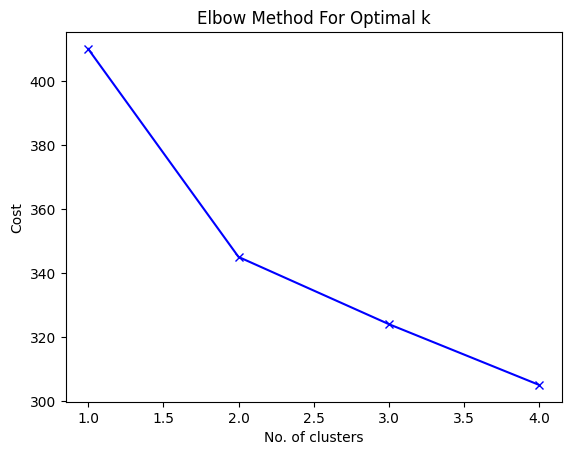

In [14]:
# Elbow curve to find optimal K
data = data_in
cost = []
K = range(1,5)
for num_clusters in list(K):
    kmode = KModes(n_clusters=num_clusters, init = "random", n_init = 5, verbose=1)
    kmode.fit_predict(data)
    cost.append(kmode.cost_)
    
plt.plot(K, cost, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()

In [15]:
# Building the model with 3 clusters
kmode = KModes(n_clusters=1, init = "random", n_init = 5, verbose=1)
clusters = kmode.fit_predict(data)
clusters

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 410.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 410.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 410.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 410.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 410.0
Best run was number 1


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=uint16)

In [16]:
data.insert(0, "Cluster", clusters, True)
data

,Cluster,gender,age,residence,daily_allowance,attendance,dismissal,travel,breaks,transportation,foodCampus,A1,A2,A3
0,0,Female,22,Imus,₱200 to ₱500,1 to 2 times a week,"Early Afternoon (e.g. 1:00PM, 3:00PM)",Less than 500m (approx. distance from Gate 3 t...,1 break,"Commute (e.g. jeep, bus, tricycle)",Yes,Food Square,"Rice meal, Beverages (e.g., fruit/milk shake, ...",₱100 to ₱200
1,0,Male,22,Bacoor,₱100 to ₱200,3 to 4 times a week,"Late Afternoon (e.g. 4:00PM, 5:00PM)",Less than 500m (approx. distance from Gate 3 t...,1 break,"Commute (e.g. jeep, bus, tricycle)",Yes,Food Square,"Rice meal, Water",₱100 to ₱200
3,0,Male,22,Bacoor,₱100 to ₱200,3 to 4 times a week,"Early Afternoon (e.g. 1:00PM, 3:00PM)",Less than 500m (approx. distance from Gate 3 t...,1 break,"Commute (e.g. jeep, bus, tricycle)",Yes,Food Square,"Rice meal, Finger foods (e.g., fries, takoyaki...",₱100 to ₱200
6,0,Male,21,Silang,₱200 to ₱500,3 to 4 times a week,"Early Afternoon (e.g. 1:00PM, 3:00PM)",Less than 500m (approx. distance from Gate 3 t...,2-3 breaks,"Commute (e.g. jeep, bus, tricycle)",Yes,Food Square,Rice meal,₱100 to ₱200
7,0,Male,22,Dasma,₱100 to ₱200,3 to 4 times a week,"Early Afternoon (e.g. 1:00PM, 3:00PM)",Less than 500m (approx. distance from Gate 3 t...,2-3 breaks,Bicycle,Yes,Food Square,Rice meal,₱100 to ₱200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,0,Female,23,Imus,₱100 to ₱200,1 to 2 times a week,"Early Afternoon (e.g. 1:00PM, 3:00PM)",Less than 500m (approx. distance from Gate 3 t...,1 break,"Commute (e.g. jeep, bus, tricycle)",Yes,Food Square,"Rice meal, Water",₱100 to ₱200
112,0,Female,20,Naic,Below ₱100,3 to 4 times a week,"Evening (e.g. 6:00PM, 7:00PM)",Less than 500m (approx. distance from Gate 3 t...,1 break,"Commute (e.g. jeep, bus, tricycle)",Yes,Milas' Canteen,"Rice meal, Beverages (e.g., fruit/milk shake, ...",Below ₱100
114,0,Male,21,Bacoor,Below ₱100,1 to 2 times a week,Noon (12:00PM),Around 1km (approx. distance from Gate 3 to Fo...,1 break,"Commute (e.g. jeep, bus, tricycle)",Yes,Milas' Canteen,"Finger foods (e.g., fries, takoyaki, etc)",Below ₱100
115,0,Male,21,Imus,Below ₱100,1 to 2 times a week,Morning (e.g. 10:00AM),Less than 500m (approx. distance from Gate 3 t...,1 break,"Commute (e.g. jeep, bus, tricycle)",Yes,Food Square,Rice meal,Below ₱100
